## 例2-2. Yelp データセット内の店舗に対するレビュー件数の可視化

In [7]:
import pandas as pd
import json

# 店舗についてのデータを読み込む
with open('data/yelp/yelp_academic_dataset_business.json') as biz_file:
    biz_df = pd.DataFrame([json.loads(x) for x in biz_file.readlines()])

biz_df.head()

,business_id,categories,city,full_address,latitude,longitude,name,neighborhoods,open,review_count,stars,state,type
0,rncjoVoEFUJGCUoC1JgnUA,"[Accountants, Professional Services, Tax Servi...",Peoria,"8466 W Peoria Ave\nSte 6\nPeoria, AZ 85345",33.581867,-112.241596,Peoria Income Tax Service,[],True,3,5.0,AZ,business
1,0FNFSzCFP_rGUoJx8W7tJg,"[Sporting Goods, Bikes, Shopping]",Phoenix,"2149 W Wood Dr\nPhoenix, AZ 85029",33.604054,-112.105933,Bike Doctor,[],True,5,5.0,AZ,business
2,3f_lyB6vFK48ukH6ScvLHg,[],Phoenix,"1134 N Central Ave\nPhoenix, AZ 85004",33.460526,-112.073933,Valley Permaculture Alliance,[],True,4,5.0,AZ,business
3,usAsSV36QmUej8--yvN-dg,"[Food, Grocery]",Phoenix,"845 W Southern Ave\nPhoenix, AZ 85041",33.392210,-112.085377,Food City,[],True,5,3.5,AZ,business
4,PzOqRohWw7F7YEPBz6AubA,"[Food, Bagels, Delis, Restaurants]",Glendale Az,"6520 W Happy Valley Rd\nSte 101\nGlendale Az, ...",33.712797,-112.200264,Hot Bagels & Deli,[],True,14,3.5,AZ,business


Text(0, 0.5, 'Occurrence')

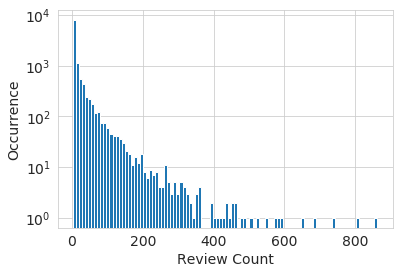

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# レビュー件数のヒストグラムを描画
sns.set_style('whitegrid')
fig, ax = plt.subplots()
biz_df['review_count'].hist(ax=ax, bins=100)
ax.set_yscale('log')
ax.tick_params(labelsize=14)
ax.set_xlabel('Review Count', fontsize=14)
ax.set_ylabel('Occurrence', fontsize=14)

## 例 2-3. 固定幅によるカウントの離散化

In [9]:
import numpy as np

np.random.seed(seed=1)

# 0から99までの整数を一様分布からランダムに20個生成する
small_counts = np.random.randint(0, 100, 20)

small_counts

array([37, 12, 72,  9, 75,  5, 79, 64, 16,  1, 76, 71,  6, 25, 50, 20, 18,
       84, 11, 28])

In [10]:
# 除算により 0-9 までの階級を割り当てる
np.floor_divide(small_counts, 10)

array([3, 1, 7, 0, 7, 0, 7, 6, 1, 0, 7, 7, 0, 2, 5, 2, 1, 8, 1, 2])

In [11]:
# 複数の桁にまたがるカウントデータの配列
large_counts = [296, 8286, 64011, 80, 3, 725, 867, 2215, 7689, 11495, 91897, 
                44, 28, 7971, 926, 122, 22222]
# 対数変換により指数幅の階級を割り当てる
np.floor(np.log10(large_counts))

array([2., 3., 4., 1., 0., 2., 2., 3., 3., 4., 4., 1., 1., 3., 2., 2., 4.])

## 例 2-4. Yelp ビジネスレビュー件数の十分位数を計算する

In [12]:
deciles = biz_df['review_count'].quantile([.1, .2, .3, .4, .5, .6, .7, .8, .9])
deciles

0.1     3.0
0.2     3.0
0.3     4.0
0.4     5.0
0.5     6.0
0.6     8.0
0.7    12.0
0.8    23.0
0.9    50.0
Name: review_count, dtype: float64

Text(0, 0.5, 'Occurrence')

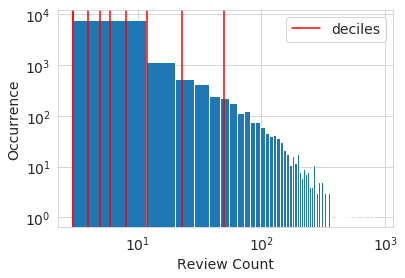

In [13]:
# ヒストグラムに十分位数を上書きする
sns.set_style('whitegrid')
fig, ax = plt.subplots()
biz_df['review_count'].hist(ax=ax, bins=100)
for pos in deciles:
    handle = plt.axvline(pos, color='r')
ax.legend([handle], ['deciles'], fontsize=14)
ax.set_yscale('log')
ax.set_xscale('log')
ax.tick_params(labelsize=14)
ax.set_xlabel('Review Count', fontsize=14)
ax.set_ylabel('Occurrence', fontsize=14)

## 例 2-5. 分位数によるカウントの離散化

In [14]:
# 例2-3の large_count を引き続き使う
import pandas as pd

# 四分位数に変換
pd.qcut(large_counts, 4, labels=False)

array([1, 2, 3, 0, 0, 1, 1, 2, 2, 3, 3, 0, 0, 2, 1, 0, 3])

In [15]:
# 分位数の計算
large_counts_series = pd.Series(large_counts)
large_counts_series.quantile([0.25, 0.5, 0.75])

0.25     122.0
0.50     926.0
0.75    8286.0
dtype: float64

## 例 2-6. 対数変換の前後でレビュー件数のヒストグラムを比較する

Text(0, 0.5, 'Occurrence')

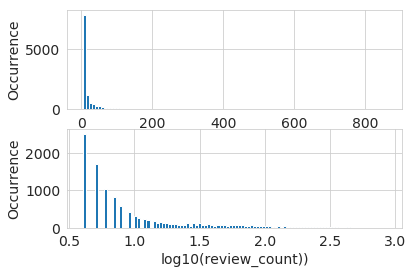

In [16]:
import numpy as np

# 例2-2で読み込んだ Yelp データセットの
# データフレーム biz_df を使用して、レビュー件数を対数変換する。
# レビュー件数 0 を対数変換してマイナス無限大になるのを防ぐために
# 対数変換の前に生データに 1 を加算していることに注意。
biz_df['log_review_count'] = np.log10(biz_df['review_count'] + 1)

fig, (ax1, ax2) = plt.subplots(2,1)
biz_df['review_count'].hist(ax=ax1, bins=100)
ax1.tick_params(labelsize=14)
ax1.set_xlabel('review_count', fontsize=14)
ax1.set_ylabel('Occurrence', fontsize=14)

biz_df['log_review_count'].hist(ax=ax2, bins=100)
ax2.tick_params(labelsize=14)
ax2.set_xlabel('log10(review_count))', fontsize=14)
ax2.set_ylabel('Occurrence', fontsize=14)